# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia


What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Data Cleaning

In [6]:
#checking for all the null values in the columns
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
df.shape

(158, 12)

In [11]:
# dropping irrelevant columns:-

df_new=df.drop(columns=['Country','Happiness Rank','Region'])

In [12]:
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Expolatory Data Analysis (EDA)

In [13]:
df_new.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
df_new.shape

(158, 9)

In [15]:
df_new.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

<Axes: >

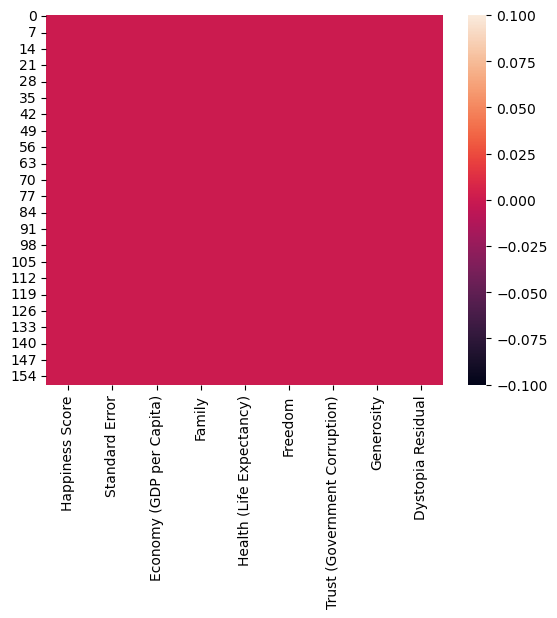

In [16]:
sns.heatmap(df_new.isnull())

In [17]:
df_new.nunique()

Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [18]:
df_new.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Now, all he remaining parameters are float type.

In [19]:
df_new.shape

(158, 9)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


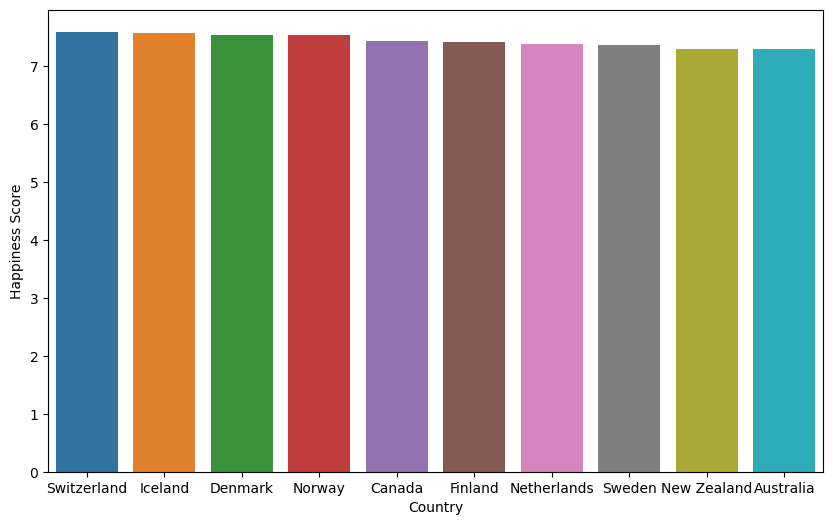

In [21]:
# Visualization:-

plt.figure(figsize=(10,6))
df_happiest=df.sort_values(by='Happiness Score',ascending=False).iloc[0:10,:]
sns.barplot(x='Country',y='Happiness Score',data=df_happiest)
plt.show()

Above data shows the Countries with Highest Happiness Score.

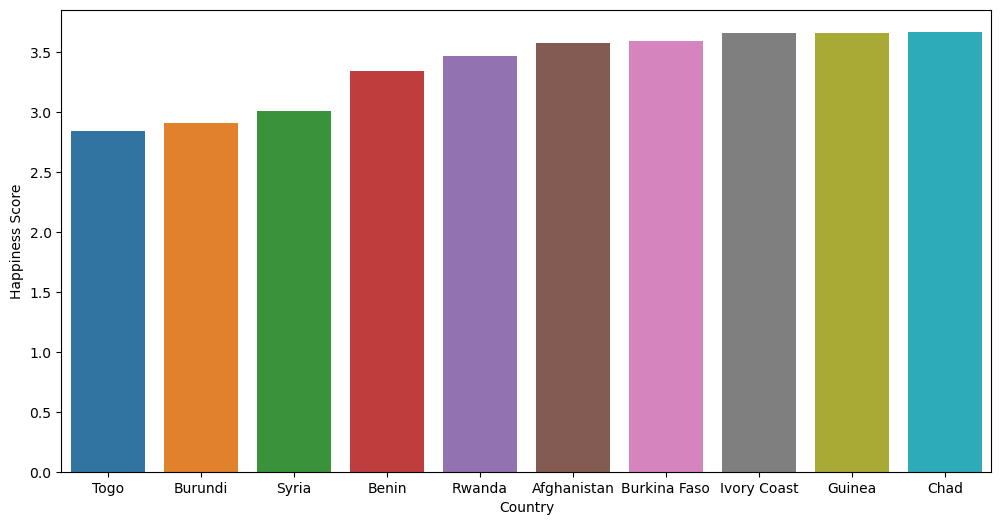

In [22]:
plt.figure(figsize=(12,6))
df_happiest=df.sort_values(by='Happiness Score',ascending=True).iloc[0:10,:]
sns.barplot(x='Country',y='Happiness Score',data=df_happiest)
plt.show()

Above data shows the Countries with Least Happiness Score.

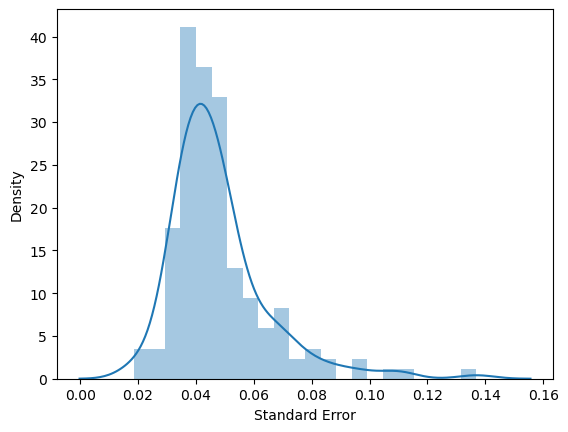

In [23]:
sns.distplot(df_new['Standard Error'])
plt.show()

Above data shows the Distribution of Error in Happiness Score.

In [24]:
df_new.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

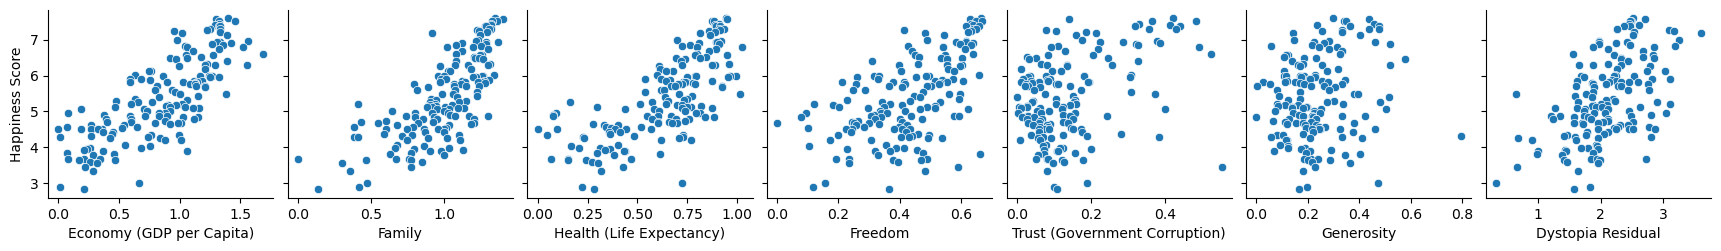

In [25]:
sns.pairplot(data=df_new,x_vars=['Economy (GDP per Capita)','Family',
                                 'Health (Life Expectancy)','Freedom',
                                'Trust (Government Corruption)','Generosity','Dystopia Residual'],
                         y_vars='Happiness Score')

plt.show()

From above observations we can see that "Economy (GDP per Capita)","Family","Health (Life Expectancy)" have almost linear relation with the happiness score.

In [26]:
# Making a deep copy

df_updated=df[['Happiness Score','Economy (GDP per Capita)','Family',
               'Health (Life Expectancy)','Freedom',
               'Trust (Government Corruption)',
               'Generosity','Dystopia Residual']].copy()

In [27]:
df_updated

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [28]:
df_updated.dtypes

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [29]:
df_updated.shape

(158, 8)

# Correlation

In [30]:
# Checking the Correlation with respect to target variable(happiness score);-

df_updated.corr()['Happiness Score'].sort_values()

Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

The Above observation shows a good correlation with respect to the target variable in which Health (Life Expectancy),Family and Economy (GDP per Capita) are highly correlated.

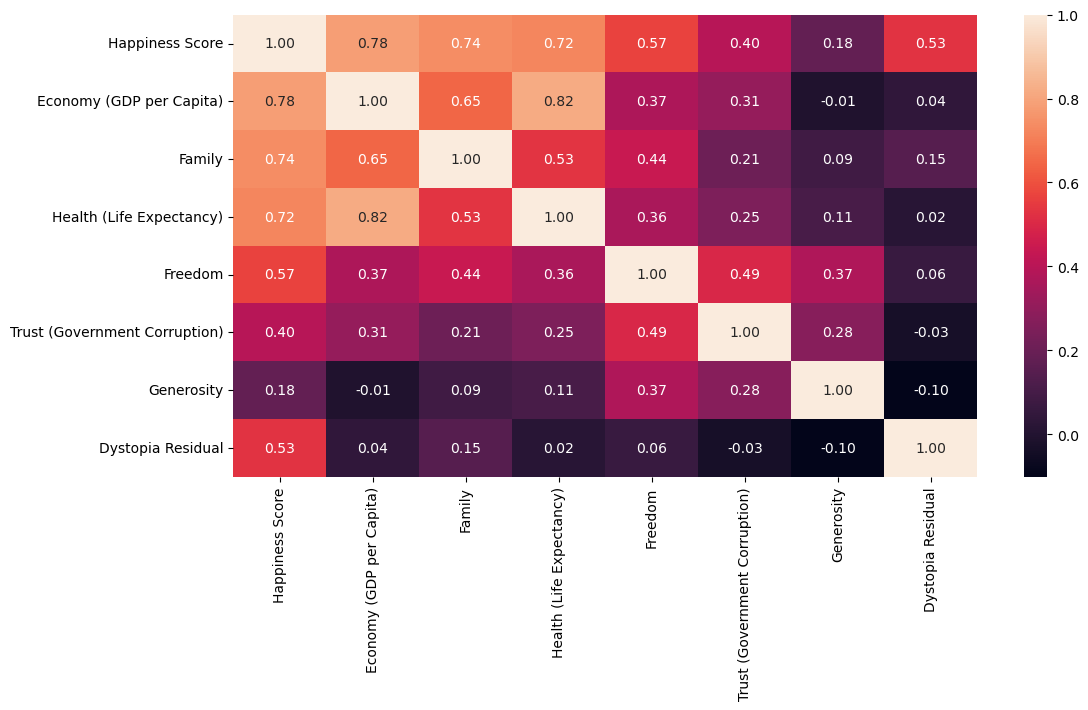

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df_updated.corr(),annot=True,fmt='0.2f')
plt.show()

# Checking for Skewness

In [32]:
df_updated.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Above observations shows that 'Family','Trust (Government Corruption)' and 'Generosity' are highley skewed among others.

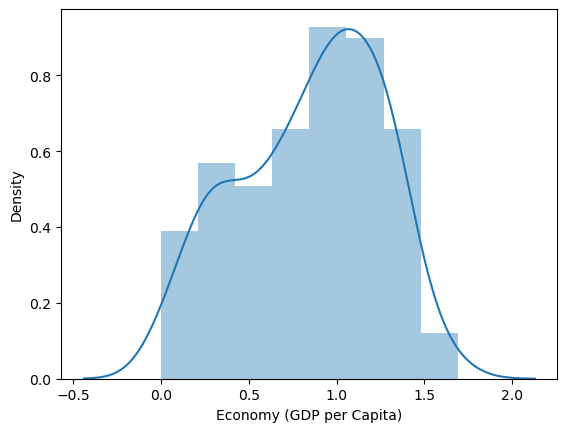

In [33]:
# checking with the distribution curve:-

sns.distplot(df_updated['Economy (GDP per Capita)'])
plt.show()

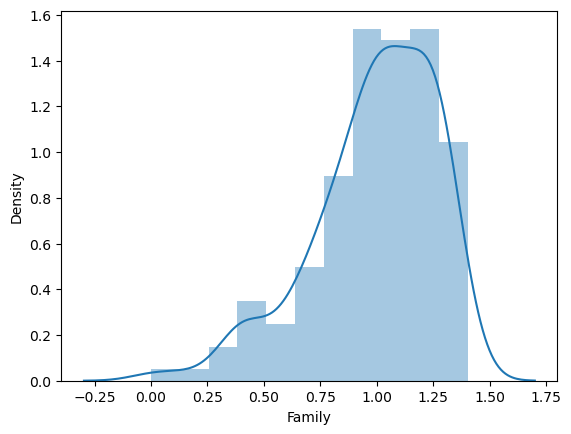

In [34]:
sns.distplot(df_updated['Family'])
plt.show()

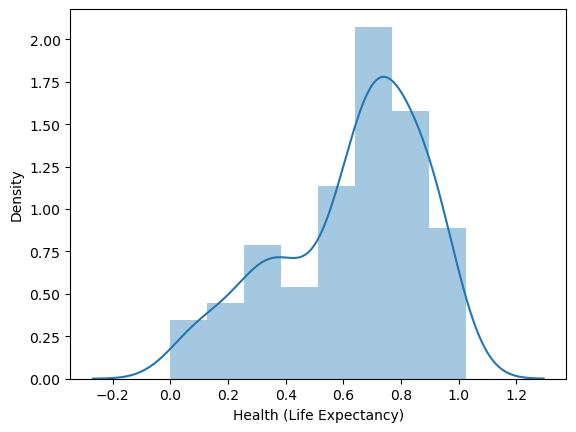

In [35]:
sns.distplot(df_updated['Health (Life Expectancy)'])
plt.show()

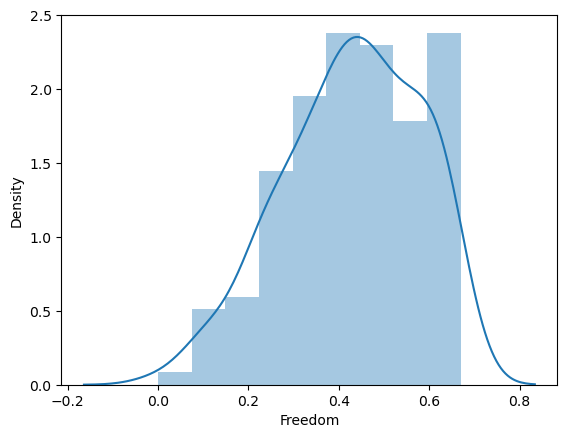

In [36]:
sns.distplot(df_updated['Freedom'])
plt.show()

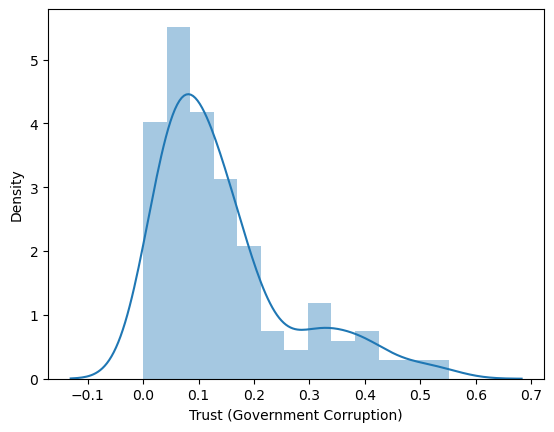

In [37]:
sns.distplot(df_updated['Trust (Government Corruption)'])
plt.show()

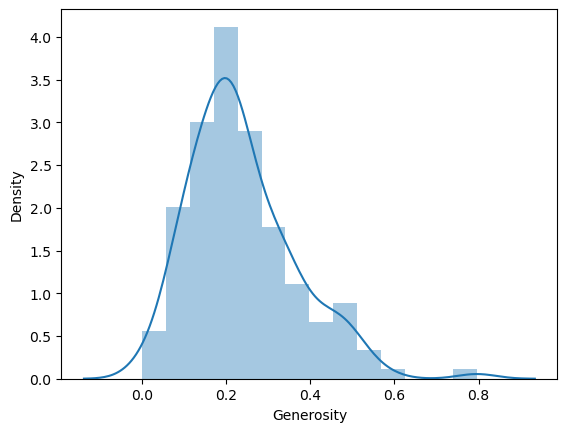

In [38]:
sns.distplot(df_updated['Generosity'])
plt.show()

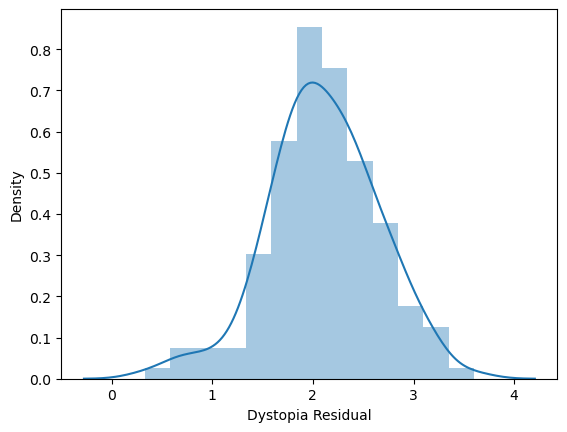

In [39]:
sns.distplot(df_updated['Dystopia Residual'])
plt.show()

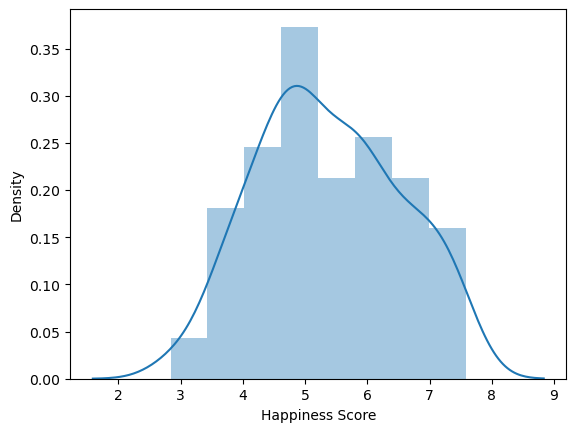

In [40]:
sns.distplot(df_updated['Happiness Score'])
plt.show()

So, the above visualizations shows that 'Trust(Government Corruption)','Generosity'
and Dystopia Residual are little skewed and 'Economy(GDP per Capita)','Health','Freedom',
'Family' and 'Happiness Score' are highly skewed.
Therefore the Data is not normalized.

# Outliers Removal

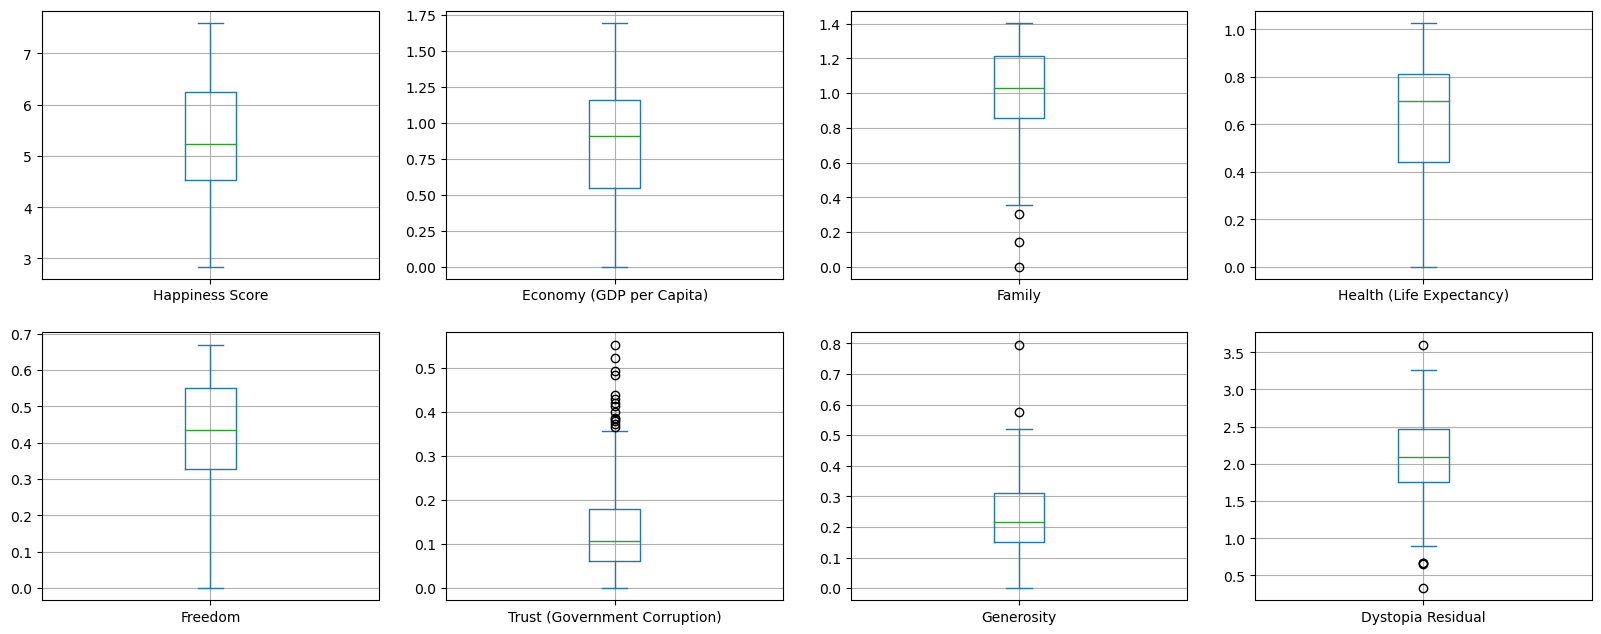

In [41]:
#We are using Boxplot to check outliers.

df_updated.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df_updated))
z

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [43]:
# index no.

np.where(z>3)

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 6, 2, 5, 7, 2], dtype=int64))

In [44]:
Happiness_new=df_updated[(z<3).all(axis=1)]
Happiness_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [45]:
df_updated.shape

(158, 8)

In [46]:
Happiness_new.shape

(152, 8)

In [47]:
# percentage data loss:-

loss_percent=(158-152)/(158100)
print(loss_percent,'%')

3.795066413662239e-05 %


In [48]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(df_updated,method='yeo-johnson')
X

array([[ 1.85703445,  1.44606101,  1.66920633, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 1.83666844,  1.17332111,  2.01213244, ...,  0.31599326,
         1.48099498,  1.11001108],
       [ 1.8100018 ,  1.23983557,  1.73958573, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [-2.20718027, -0.5134688 , -1.69066357, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-2.31217748, -1.89495386, -1.79680304, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [-2.38132666, -1.52122584, -2.16039658, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [49]:
X.ndim

2

In [50]:
X.std()

1.0

In [51]:
x=Happiness_new.drop(['Happiness Score'],axis=1)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [52]:
y=Happiness_new['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

# Preprocessing

In [53]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Machine Learning Algorithms Training and Testing Process

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

# Linear Regression

In [55]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state",{i},train_accuracy)
    print("At random state",{i},test_accuracy)
    print("\n")

At random state {0} 0.9999999401994266
At random state {0} 0.9999999105856291


At random state {1} 0.9999999422782792
At random state {1} 0.9999998925450942


At random state {2} 0.9999999366800707
At random state {2} 0.9999999196193731


At random state {3} 0.9999999382657543
At random state {3} 0.9999999211135586


At random state {4} 0.9999999355748581
At random state {4} 0.999999918554076


At random state {5} 0.9999999439237856
At random state {5} 0.9999998925133334


At random state {6} 0.9999999431580001
At random state {6} 0.9999998964547809


At random state {7} 0.9999999389196892
At random state {7} 0.999999913778356


At random state {8} 0.9999999247635916
At random state {8} 0.9999999644972396


At random state {9} 0.99999992816468
At random state {9} 0.9999999603998673


At random state {10} 0.9999999348031967
At random state {10} 0.9999999369812542


At random state {11} 0.9999999293244844
At random state {11} 0.9999999546169925


At random state {12} 0.999999930970616
A

In [56]:
#Above observations shows that our model is overfitted,lets try feature selection.

In [57]:
x_feature=x.drop(["Economy (GDP per Capita)"],axis=1)
scaler=StandardScaler()
x_feature=scaler.fit_transform(x_feature)

In [58]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state",{i},train_accuracy)
    print("At random state",{i},test_accuracy)
    print("\n")

At random state {0} 0.9692991977994705
At random state {0} 0.9687698647296009


At random state {1} 0.9720516886567044
At random state {1} 0.9522727250903642


At random state {2} 0.9656732003649104
At random state {2} 0.9817386247103285


At random state {3} 0.9759125683964852
At random state {3} 0.9418475540933006


At random state {4} 0.964220894695111
At random state {4} 0.9821829453554478


At random state {5} 0.9701129242022062
At random state {5} 0.9660090445798404


At random state {6} 0.9698228856519119
At random state {6} 0.9671375335923402


At random state {7} 0.9683765960190519
At random state {7} 0.9699406093746662


At random state {8} 0.9660109352117144
At random state {8} 0.9775338316417667


At random state {9} 0.9683818656495295
At random state {9} 0.9713858932255222


At random state {10} 0.9700569680737308
At random state {10} 0.9662767101170541


At random state {11} 0.965458528609713
At random state {11} 0.979740024595213


At random state {12} 0.967231203581686


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.20,random_state=20)

In [60]:
# Cross Validation:-

train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(j,cv_score,cv_mean,train_accuracy,test_accuracy)
    print("\n")

2 [0.99999977 0.99999967] 0.999999722557913 -0.8810736515984956 -1.1893750448130196


3 [0.99999979 0.99999917 0.99999945] 0.999999468361971 -0.8810736515984956 -1.1893750448130196


4 [0.9999996  0.99999841 0.9999976  0.99999941] 0.9999987556096168 -0.8810736515984956 -1.1893750448130196


5 [0.99999947 0.99999824 0.99999841 0.99999437 0.99999922] 0.9999979441239665 -0.8810736515984956 -1.1893750448130196


6 [0.9999991  0.9999991  0.99999708 0.99999408 0.99999369 0.99999905] 0.9999970173842118 -0.8810736515984956 -1.1893750448130196


7 [0.99999873 0.99999918 0.99998924 0.99999658 0.99999304 0.99999212
 0.99999892] 0.999995402544374 -0.8810736515984956 -1.1893750448130196


8 [0.99999846 0.99999888 0.99999599 0.99999589 0.99999263 0.99998647
 0.99999169 0.99999883] 0.9999948552597964 -0.8810736515984956 -1.1893750448130196


9 [0.999998   0.99999836 0.99999748 0.99998221 0.99999496 0.99998869
 0.99998401 0.99999624 0.99999877] 0.9999931922183767 -0.8810736515984956 -1.189375044813019

# Hyperparameter Tuning

In [61]:
# Regularization;

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [63]:
# final model training;

ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

96.91782537275826

So,we are getting our model accuracy and Cross-Validation-Score both as 96.91% which shows our model is performing extremely well".

# Conclusion

In [64]:
# model prediction using Linear Regression
x_predict = list(ls.predict(x_test))
ls_world_happiness = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(ls_world_happiness))

     predicted_values  orignal_values
113          4.495657           4.633
67           5.610428           5.605
107          5.018839           4.715
132          4.193496           4.252
136          3.606449           4.033
92           5.036053           5.007
123          4.507141           4.436
21           6.584513           6.853
85           5.019208           5.124
12           7.074785           7.200
140          4.302261           3.931
125          4.390720           4.369
75           5.264730           5.332
36           6.241158           6.302
29           6.647197           6.574
88           4.994118           5.098
13           7.168903           7.187
135          4.037662           4.077
122          4.310035           4.507
63           5.633238           5.716
74           5.665515           5.360
141          4.202543           3.904
114          4.874158           4.610
20           6.824390           6.867
57           5.847032           5.824
134         

In [65]:
#end...